# Apprentissage Supervisé - Classification

*Lorenzo Brucato - Alexandre Loret*
___

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# fonctions pour la regression
from ClfFunctions import *

## 1. Chargement, pré traitement des données et visualisation

In [50]:
train = pd.read_csv("data/train.csv").drop(['Unnamed: 0'], axis=1) # jeu de données d'entrainement
test = pd.read_csv("data/test.csv").drop(["row_ID"],axis=1)

In [51]:
n, p = train.shape
print(n, p) # 100000 données d'entrainement pour 55 variables

100000 55


### 1.1 Valeurs manquantes

Pas de valeurs manquantes dans les données :

In [42]:
print(pd.isna(train).sum().sum())
print(pd.isna(test).sum().sum())

0
0


In [43]:
train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

### 1.2 Analyse des variables explicatives

**Description des variables :**

*Variables explicatives :* 
- `Elevation` : elevation en mètres
- `Aspect` : aspect (en degrés azimuth)
- `Slope` : degré de pente (en degré)
- `Horizontal_Distance_To_Hydrology` : distance horizontale à la source d'eau la plus proche
- `Vertical_Distance_To_Hydrology` : distance vertical à la source d'eau la plus proche
- `Horizontal_Distance_To_Roadways` : distance horizontale à la route la plus proche
- `Hillshade_9am` : ombre de relief (9h du matin)
- `Hillshade_Noon` : ombre de relief (midi)
- `Hillshade_3pm` : ombre de relief (3h de l'après-midi)
- `Horizontal_Distance_To_Fire_Points` : distance horizontale au départ d'incendie de forêt le plus porche
- `Wilderness_AreaX` : type naturel (4 modalités, 0:absence, 1:presence)
- `Soil_typeX` : type de sol (40 modalités, 0:absence, 1:presence)

*Variable cible :*
- `Cover_type` : type de forêt (7 modalités, 1:Spruce, 2:Lodgepole Pine, 3:Ponderosa Pine, 4:Cottonwood/Willow, 5:Aspen, 6:Douglas-fir, 7:Krummholz)

#### 1.2.1 Description des variables et valeurs aberrantes

In [76]:
train.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2959.215150,155.551260,14.122850,269.605630,46.821590,2350.361130,212.103800,223.348670,142.585660,1976.436530,...,0.090250,0.079220,0.002800,0.003080,0.000200,0.000570,0.027890,0.024050,0.015440,2.054180
std,280.832825,111.759698,7.507368,212.770595,58.689319,1560.499103,26.841126,19.756411,38.459542,1324.925172,...,0.286541,0.270083,0.052841,0.055412,0.014141,0.023868,0.164658,0.153205,0.123295,1.398794
min,1860.000000,0.000000,0.000000,0.000000,-161.000000,0.000000,0.000000,42.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,59.000000,9.000000,108.000000,7.000000,1103.000000,198.000000,213.000000,119.000000,1020.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1992.000000,218.000000,226.000000,143.000000,1704.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3331.250000,231.000000,237.000000,169.000000,2549.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,62.000000,1383.000000,598.000000,7078.000000,254.000000,254.000000,254.000000,7126.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [77]:
test.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000,...,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000
mean,2959.396516,155.678750,14.099723,269.391333,46.335129,2350.102014,212.154832,223.312489,142.516330,1981.092599,...,0.044242,0.090422,0.077403,0.002767,0.003291,0.000206,0.000501,0.026577,0.023702,0.014981
std,279.808380,111.945819,7.484261,212.503535,58.212679,1558.997695,26.755075,19.771265,38.235983,1324.043373,...,0.205633,0.286785,0.267231,0.052530,0.057273,0.014345,0.022378,0.160845,0.152120,0.121476
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,29.000000,1998.000000,218.000000,226.000000,143.000000,1711.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,261.000000,18.000000,384.000000,69.000000,3327.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 1.2.2 Variables catégorielles et variables supplémentaires

Les variables catrégorielles sont déjà mises sous forme de one-hot-vector encoding.

### 1.3 Visualisation

**Matrice de correlation :**

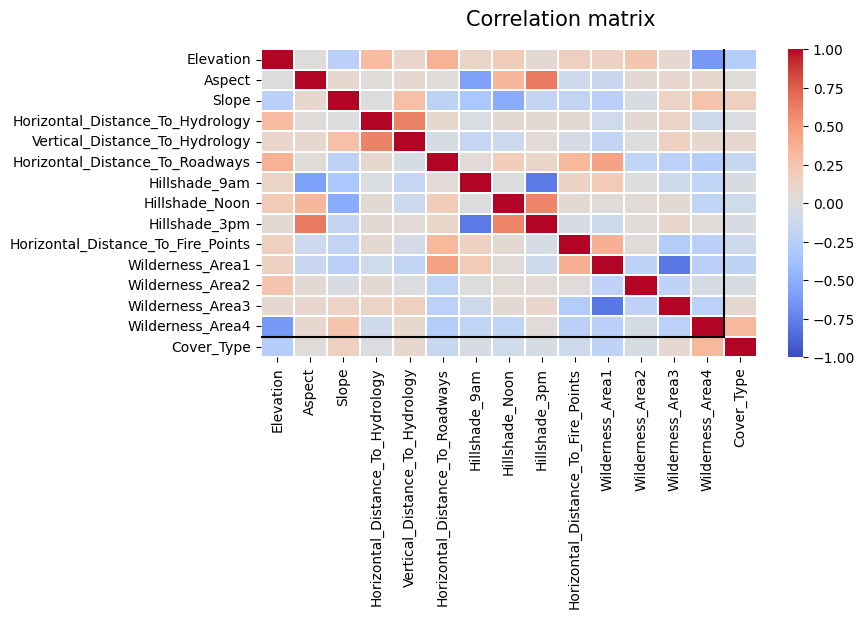

In [31]:
# corrplot(train, 'Cover_Type',num_cols=5)
corrplot(train.drop(train.columns[14:-1],axis=1), 'Cover_Type', num_cols=14,mt_width=1)

In [5]:
# corrplot_complete(train.drop(train.columns[14:-1],axis=1), 'Cover_Type')

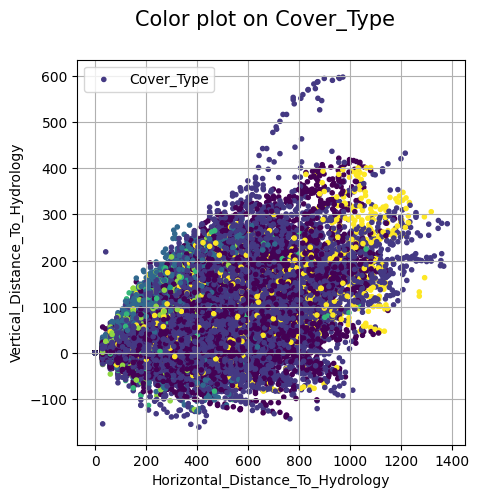

In [79]:
colorScatterPlot('Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Cover_Type', train)

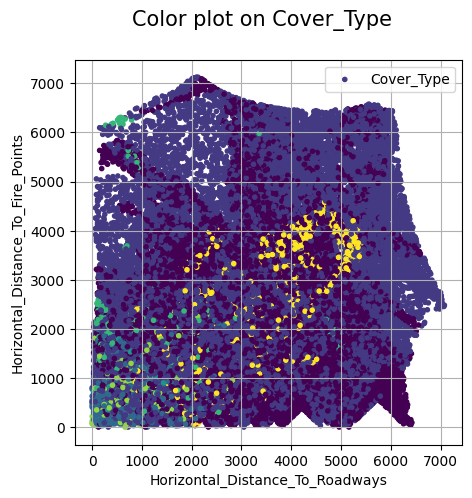

In [81]:
colorScatterPlot('Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Cover_Type', train)

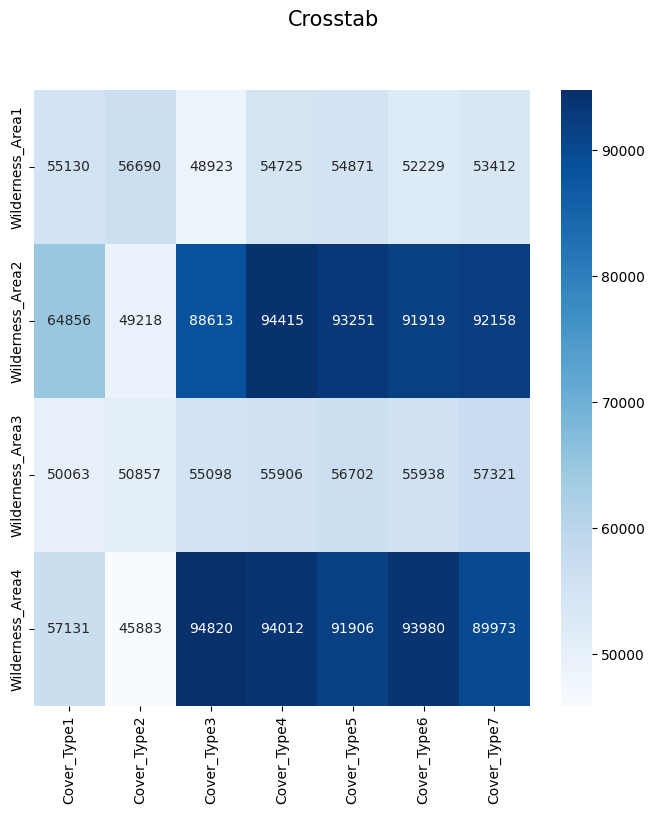

In [4]:
crosstab(train.iloc[:,10:14],train.iloc[:,-1],prefix=("Wilderness_Area","Cover_Type"))

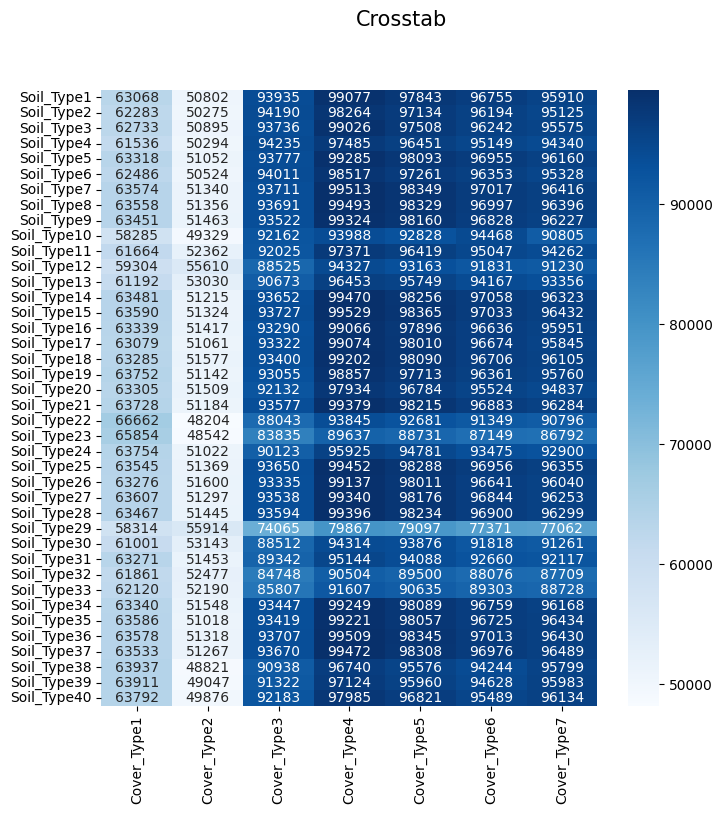

In [5]:
crosstab(train.iloc[:,14:54],train.iloc[:,-1],prefix=("Soil_Type","Cover_Type"))


**PCA (AFC ?) sur les types de sol : (à faire ?)**

## 2. Analyse des modèles prédictifs

**Métriques de mesure de performance et recherche d'hyperparamètres par validation croisée :**

In [55]:
# recherche d'hyperparamètres par validation croisée
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

scoring = {
    'f1_weighted': make_scorer(f1_score, greater_is_better=True, average='weighted'),
    'f1_macro': make_scorer(f1_score, greater_is_better=True, average='macro'),
}

**Train, test split et standardisation des données :**

In [56]:
Xtrain, Ytrain = train.drop(['Cover_Type'], axis=1), train['Cover_Type']
Xtest = test.copy()

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

### 2.1 Regression logistique

In [10]:
from sklearn.linear_model import LogisticRegression

LogitModel = LogisticRegression(max_iter=1000)

Logit_CV = GridSearchAnalysis(LogitModel, Xtrain, Ytrain, scoring)

In [11]:
Logit_CV.score_table()

,fit_time,f1_weighted,f1_macro
0,7.623 ± 0.910,0.716 ± 0.003,0.530 ± 0.006


### 2.2 Arbres


In [36]:
from sklearn.tree import DecisionTreeClassifier

TreeModel = DecisionTreeClassifier()

param_grid = {
    "max_depth":[10,30,50,70,100,150]
}

Tree_CV = GridSearchAnalysis(TreeModel, Xtrain, Ytrain, scoring, param_grid=param_grid)

KeyboardInterrupt: 

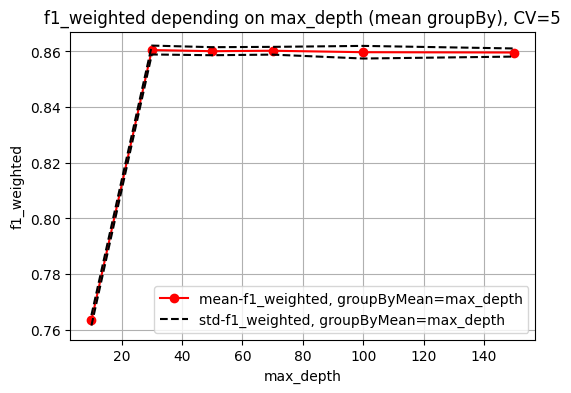

In [16]:
Tree_CV.plot_score(groupBy='max_depth')

In [17]:
Tree_CV.score_table()

,max_depth,fit_time,f1_weighted,f1_macro
0,10,0.989 ± 0.141,0.763 ± 0.002,0.647 ± 0.009
1,30,1.791 ± 0.094,0.861 ± 0.002,0.793 ± 0.008
2,50,1.536 ± 0.039,0.860 ± 0.001,0.792 ± 0.010
3,70,1.547 ± 0.028,0.860 ± 0.001,0.792 ± 0.009
4,100,1.758 ± 0.174,0.860 ± 0.002,0.790 ± 0.009
5,150,1.813 ± 0.249,0.860 ± 0.001,0.788 ± 0.007


In [59]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

TreeModel = DecisionTreeClassifier(max_depth=30)
TreeModel.fit(Xtrain, Ytrain)

print(export_text(TreeModel,feature_names=test.columns,max_depth=3))

|--- Elevation <= 0.30
|   |--- Elevation <= -1.59
|   |   |--- Elevation <= -1.72
|   |   |   |--- Horizontal_Distance_To_Hydrology <= -1.20
|   |   |   |   |--- truncated branch of depth 17
|   |   |   |--- Horizontal_Distance_To_Hydrology >  -1.20
|   |   |   |   |--- truncated branch of depth 24
|   |   |--- Elevation >  -1.72
|   |   |   |--- Soil_Type4 <= 3.34
|   |   |   |   |--- truncated branch of depth 20
|   |   |   |--- Soil_Type4 >  3.34
|   |   |   |   |--- truncated branch of depth 7
|   |--- Elevation >  -1.59
|   |   |--- Soil_Type4 <= 3.34
|   |   |   |--- Soil_Type2 <= 4.29
|   |   |   |   |--- truncated branch of depth 27
|   |   |   |--- Soil_Type2 >  4.29
|   |   |   |   |--- truncated branch of depth 14
|   |   |--- Soil_Type4 >  3.34
|   |   |   |--- Elevation <= -0.91
|   |   |   |   |--- truncated branch of depth 15
|   |   |   |--- Elevation >  -0.91
|   |   |   |   |--- truncated branch of depth 11
|--- Elevation >  0.30
|   |--- Elevation <= 1.31
|   |   |-

Les premières branches de l'arbre concernent beaucoup l'élévation.

### 2.3 Enssembles


## 3. Soumissions

**1) Regression logistique : public score = 0.66102**

In [8]:
from sklearn.linear_model import LogisticRegression

LogitModel = LogisticRegression(max_iter=1000)

LogitModel.fit(Xtrain, Ytrain)

Ypred = LogitModel.predict(Xtest) 

submit_model('test', Ypred, test)

**1) Arbre de décision : public score = ?**


In [12]:
from sklearn.tree import DecisionTreeClassifier
TreeModel = DecisionTreeClassifier(max_depth=30)

TreeModel.fit(Xtrain, Ytrain)

Ypred = TreeModel.predict(Xtest) 

submit_model('pred', Ypred, test)

In [13]:
pd.DataFrame({
    'row_ID':test.index,
    'Cover_Type':Ypred
}).to_csv('predictions/' + 'pred' + '.csv', index=False)